In [1]:
import qctoolkit as qtk # https://github.com/SamKChang/qctoolkit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import glob
import os
import ast
import seaborn as sns

qtk.setting.quiet = True
sns.set()

%matplotlib inline

# Sanity checks on radial distribution function

To make sure radial distribution function is bug free, detail checks is done on small systems where the actual atom pair distance can be counted by hand. All checks below give correct results and therefore there is no clue for bugs in $g(r)$ calculations.

## 2$\times$1$\times$1 fcc supercell 
**2 Ga and 2 As**

Conventionally, $g_{\rm GaAs}(r)$ is radially normalized, meaning 
$$
g_{\rm GaAs}(r) = \frac{N_{\rm GaAs}(r)}{4\pi r^2},
$$
where $N_{\rm GaAs}(r)$ is the number of Ga-As pair as distance $r$. 
The method **gr** takes a flag **radial_normalization** to return either $g(r)$ or $N(r)$ depending on selected atom types.

In [2]:
mol_base = qtk.Molecule('xyz/gaas_2.xyz')
mol_211 = mol_base.copy()
mol_211.extend([2,1,1], normalize=True)

In [3]:
r, g = mol_211.gr('Ga', 'As', radial_normalization=True)
r, N = mol_211.gr('Ga', 'As', radial_normalization=False)

N(r): [ 3.  1.] , r: [ 2.4475  6.1625]


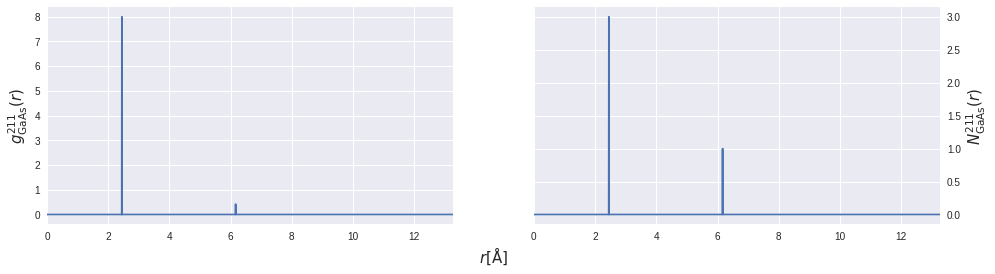

In [4]:
fig, [ax1, ax2] = plt.subplots(1,2,figsize=(16,4))
ax1.plot(r, g)
ax1.set_xlim(r.min(), r.max())
ax1.set_xlabel(r'$r [{\rm \AA}]$',x=1.1, fontsize=15)
ax1.set_ylabel(r'$g_{\rm GaAs}^{211}(r)$', fontsize=15)
ax2.plot(r, N)
print "N(r):", N[N>0], ", r:", r[N>0]
ax2.set_xlim(r.min(),r.max())
ax2.set_ylabel(r'$N_{\rm GaAs}^{211}(r)$', fontsize=15)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
pass

$N_{\rm GaAs}^{211}(r)$ correctly gives 3 Ga-As pair at 2.4 angstrom and 1 Ga-As pair at 6.1 angstrom.

## 3$\times$1$\times$1, 2$\times$2$\times$1, 2$\times$2$\times$2 fcc supercells

311
N(r): [ 5.  3.  1.]
r: [  2.4475   6.1625  10.0925]

221
N(r): [ 8.  3.  4.  1.]
r: [ 2.4475  4.6875  6.1625  9.2675]

222
N(r): [ 20.  21.  12.   4.   6.   1.]
r: [  2.4475   4.6875   6.1625   7.3425   9.2675  12.2425]



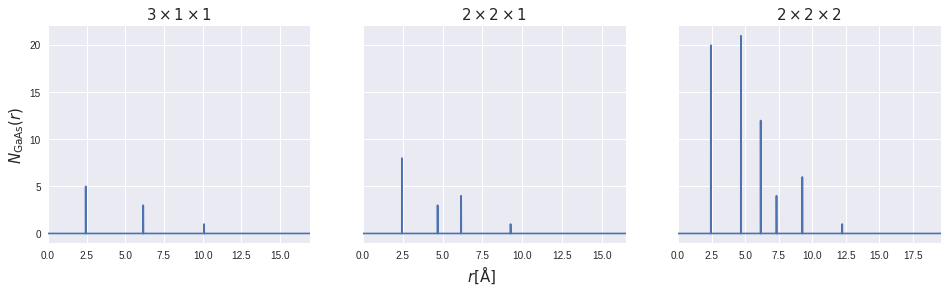

In [5]:
mol_base = qtk.Molecule('xyz/gaas_2.xyz')
mol_311 = mol_base.copy()
mol_311.extend([3,1,1], normalize=True)
mol_311.symmetry=False
mol_311.write('test_311.xyz')

mol_221 = mol_base.copy()
mol_221.extend([2,2,1], normalize=True)
mol_221.symmetry=False
mol_221.write('test_221.xyz')

mol_222 = mol_base.copy()
mol_222.extend([2,2,2], normalize=True)
mol_222.symmetry=False
mol_222.write('test_222.xyz')

mols = [mol_311, mol_221, mol_222]
names = [r'$3\times 1\times1$', r'$2\times 2\times 1$', r'$2\times 2\times 2$']
systems = ['311', '221', '222']

fig, axs = plt.subplots(1, 3, figsize=(16,4), sharey=True)

for i in range(3):
    mol = mols[i]
    ax = axs[i]
    r, N = mol.gr('Ga', 'As', radial_normalization=False)
    print systems[i]
    print "N(r):", N[N>0]
    print "r:", r[N>0]
    print 
    ax.plot(r, N)
    ax.set_xlim(r.min(),r.max())
    ax.set_title(names[i], fontsize=15)
axs[0].set_xlabel(r'$r [{\rm \AA}]$',x=1.65, fontsize=15)
axs[0].set_ylabel(r'$N_{\rm GaAs}(r)$', fontsize=15)
pass

Number of Ga-As pair counts at each distance are correct, note that the fcc primitive cell is not orthorhombic.

## $3\times 1\times 1$ Al$_{0.25}$Ga$_{0.75}$As supercell
**4 fcc primitive cells with 1 Ga mutates to Al**

Ga-As
N(r): [ 4.  2.]
r: [ 2.4475  6.1625]

Al-As
N(r): [ 1.  1.  1.]
r: [  2.4475   6.1625  10.0925]

Al-Ga
N(r): [ 1.  1.]
r: [ 3.9975  7.9975]



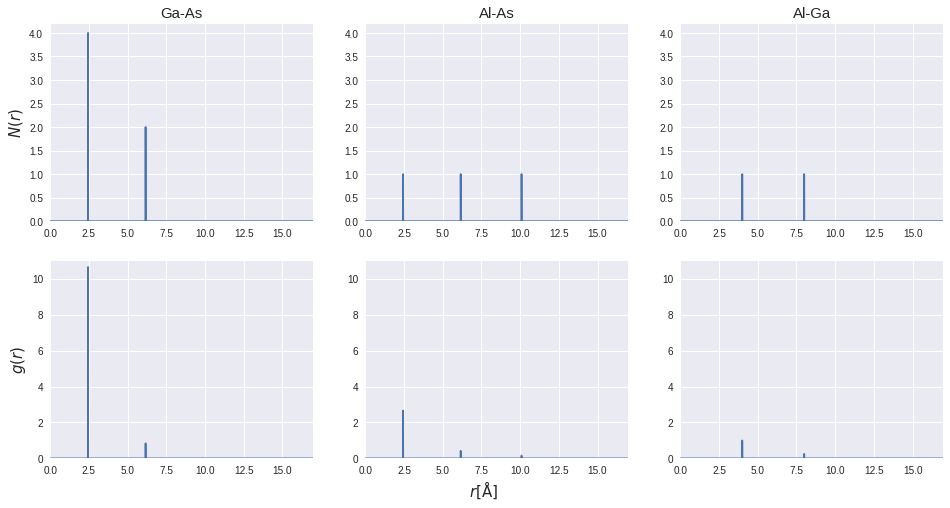

In [6]:
mol_base = qtk.Molecule('xyz/gaas_2.xyz')
algaas = mol_base.copy()
algaas.extend([3,1,1], normalize=True)
algaas.symmetry=False
algaas.setAtoms(0, Z=13)
algaas.write('test_algaas.xyz')

r, N_gaas = algaas.gr('Ga', 'As', radial_normalization=False)
r, N_alas = algaas.gr('Al', 'As', radial_normalization=False)
r, N_alga = algaas.gr('Al', 'Ga', radial_normalization=False)
r, g_gaas = algaas.gr('Ga', 'As', radial_normalization=True)
r, g_alas = algaas.gr('Al', 'As', radial_normalization=True)
r, g_alga = algaas.gr('Al', 'Ga', radial_normalization=True)
N_all = [N_gaas, N_alas, N_alga]
g_all = [g_gaas, g_alas, g_alga]
titles = ['Ga-As', 'Al-As', 'Al-Ga']

fig, [axs, axs_2] = plt.subplots(2, 3, figsize=(16,8))

for i in range(3):
    ax = axs[i]
    ax2 = axs_2[i]
    N = N_all[i]
    g = g_all[i]
    print titles[i]
    print "N(r):", N[N>0]
    print "r:", r[N>0]
    print 
    ax.plot(r, N)
    ax.set_xlim(r.min(),r.max())
    ax.set_title(titles[i], fontsize=15)
    ax.set_ylim(0,4.2)
    ax2.set_ylim(0,11)
    ax2.plot(r, g)
    ax2.set_xlim(r.min(),r.max())
axs[0].set_ylabel(r'$N(r)$', fontsize=15)
axs_2[0].set_xlabel(r'$r [{\rm \AA}]$',x=1.65, fontsize=15)
axs_2[0].set_ylabel(r'$g(r)$', fontsize=15)

pass

It can be easily verified that $N_{\rm GaAs}^{\rm AlGaAs}(r) + N_{\rm AlAs}^{\rm AlGaAs}(r) = N_{\rm GaAs}^{\rm GaAs}(r)$, where the nearest, second nearset, and the third nearest distance counts are

$$
\begin{array}{lcl}
N_{\rm GaAs}^{\rm AlGaAs}(r) &=& (4, 2, 0)\\
N_{\rm AlAs}^{\rm AlGaAs}(r) &=& (1, 1, 1)\\
N_{\rm GaAs}^{\rm GaAs}(r) &=& (5, 3, 1)
\end{array}
$$

## Analysis on optimized a crystal 
**$3\times 3\times 3$ supercell with 27 III-sites (Ga or Al) and 27 As**

In [7]:
mol_base = qtk.Molecule('xyz/gaas_2.xyz')
mol_base.extend([3,3,3], normalize=True)

# ccs instance that defines the compound space
ccs = qtk.CCS(mol_base, 'ccs.yml')
# optimization log
log01 = qtk.Logger('optimization/algaas_333_01.db')

# extract best molecules from optimization
mols = []

N_mol = 3

for entry in log01.list(order='descent')[:N_mol]:
    # extract dictionary of mutation location
    ccs_coord = ast.literal_eval(entry.content)
    # generate molecule object using ccs coordinate and ccs instance
    mols.append(ccs.generate(**ccs_coord))
    

mol_name = ['Best crystal', 'Second best crystal', 'Third best crystal']

In [8]:
def opt_rdf_test(radial_normalization=False):

    
    fig, axarr = plt.subplots(N_mol, 4, figsize=(16, 4*N_mol), sharex=True, sharey=True)
    r, y_base = mol_base.gr('Ga', 'As', radial_normalization=radial_normalization)
    if radial_normalization:
        y_name = 'g'
    else:
        y_name = 'N'
    
    for i in range(N_mol):

        mol = mols[i]

        r, y_GaAs = mol.gr('Ga', 'As', radial_normalization=radial_normalization)
        r, y_AlAs = mol.gr('Al', 'As', radial_normalization=radial_normalization)
        y_diff = y_GaAs + y_AlAs - y_base
        y_diff[np.abs(y_diff) < 1E-5] = 0
        y_all = [y_GaAs + y_AlAs, y_GaAs, y_AlAs, y_diff]

        for j in range(4):
            ax = axarr[i, j]
            y = y_all[j]
            ax.plot(r, y)
            ax.set_xlim(2, 20)
            
            if j == 0:
                y_min, y_max = ax.get_ylim()
            else:
                ax.set_ylim(y_min, y_max)
            
            if j == 3:
                try:
                    ax.set_ylabel(mol_name[i], fontsize=15)
                    ax.yaxis.set_label_position('right')
                except:
                    pass

    axarr[N_mol-1,0].set_xlabel(r'$r [\rm \AA]$', x=2.3, fontsize=15)
    axarr[N_mol-1,0].set_ylabel(r'$%s(r)$' % y_name, y=1.65, fontsize=15)
    axarr[0, 0].set_title(r'${}_{{\rm GaAs}}(r)+{}_{{\rm AlAs}}(r)$'.format(y_name, y_name), fontsize=15)
    axarr[0, 1].set_title(r'${}_{{\rm GaAs}}(r)$'.format(y_name), fontsize=15)
    axarr[0, 2].set_title(r'${}_{{\rm AlAs}}(r)$'.format(y_name), fontsize=15)
    axarr[0, 3].set_title(
        r'${}_{{\rm GaAs}}(r)+{}_{{\rm AlAs}}(r)-{}_{{\rm GaAs}}^{{\rm ref}}(r)$'.format(
            y_name, y_name, y_name
        ), 
        fontsize=15
    )
    return fig

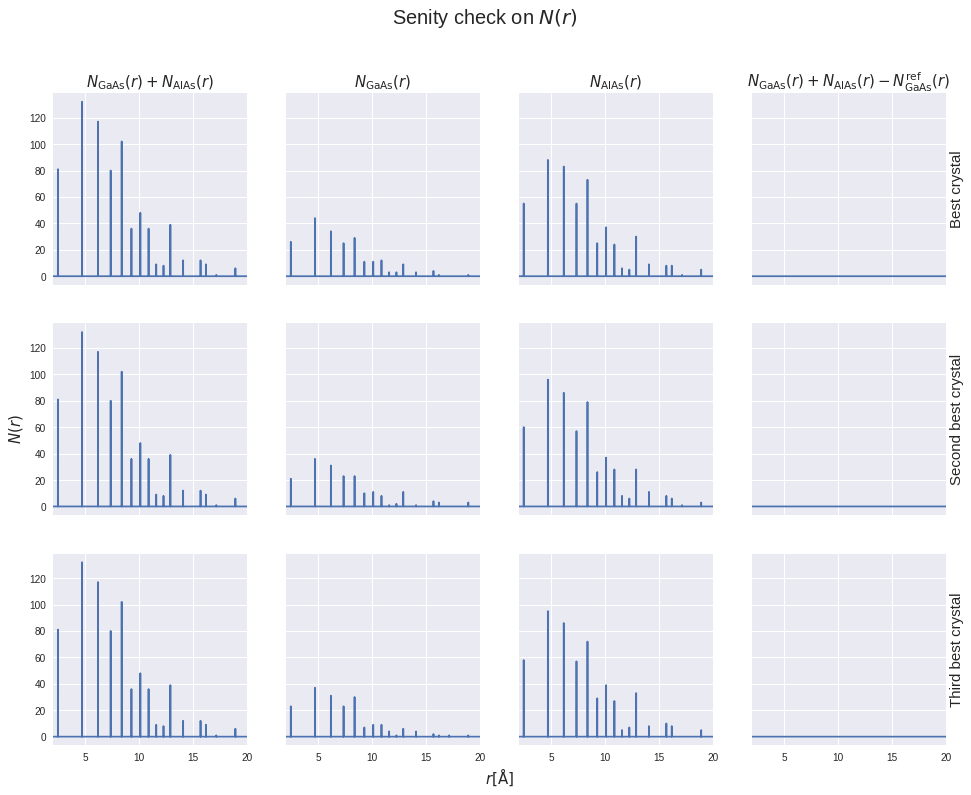

In [9]:
opt_rdf_test()
plt.suptitle(r'Senity check on $N(r)$', fontsize=20)
pass

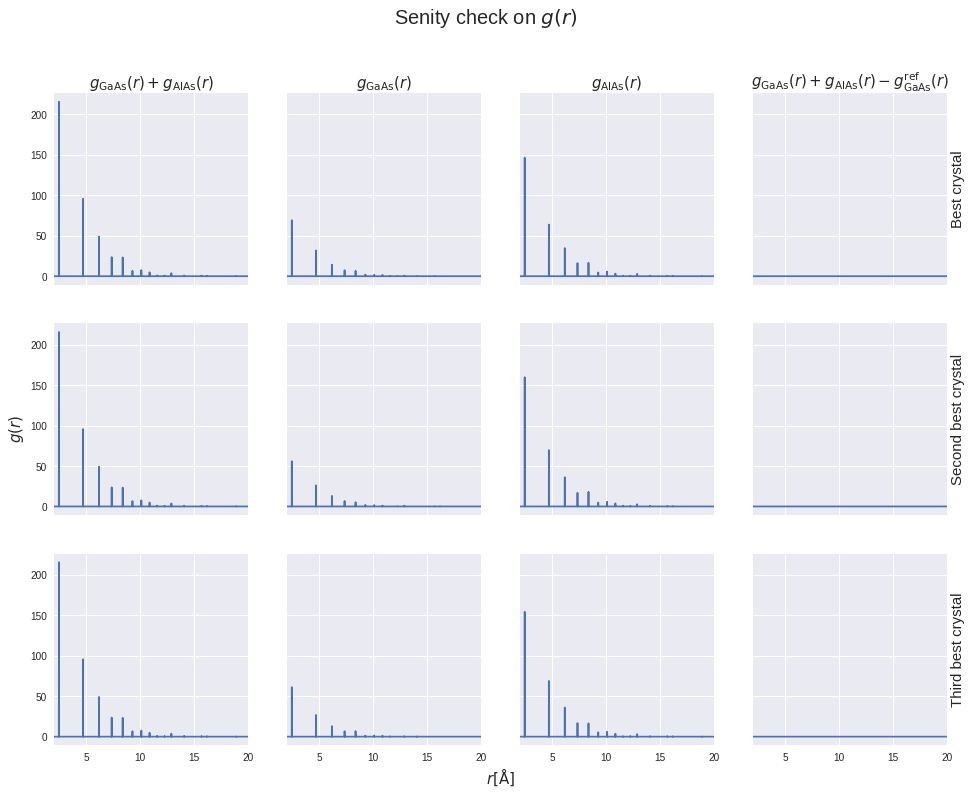

In [10]:
opt_rdf_test(True)
plt.suptitle(r'Senity check on $g(r)$', fontsize=20)
pass

# Structual analysis on optimized crystals

Having thoroughly tested the code for **g(r)** calculation, I am confident the results is bug free. Since it is easier to understand $N(r)$ than $g(r)$, the analysis below will focus only on $N(r)$ for various cases

## $N_{\rm AlAs}(r)$ for the best crystals

As shown above, $N_{\rm AlAs}(r) + N_{\rm GaAs}(r) = N_{\rm GaAs}^{\rm ref}(r)$, I only need to focus on $N_{\rm AlAs}(r)$. In order to show the structrual variations, it is compared with scaled $N_{\rm GaAs}^{\rm ref}(r)$. That is I am looking at the quantity

$$
\Delta N_{\rm AlAs}(r) = N_{\rm AlAs}(r) - x N_{\rm GaAs}^{\rm ref}(r),
$$

or

$$
\Delta N_{\rm GaAs}(r) = N_{\rm GaAs}(r) - (1-x) N_{\rm GaAs}^{\rm ref}(r),
$$

where $x$ is the mole fraction of Al in the optimized Al$_x$Ga$_{1-x}$As crystals. Note that 

$$
\Delta N_{\rm AlAs}(r) + \Delta N_{\rm GaAs}(r) = N_{\rm AlAs}(r) + N_{\rm GaAs}(r) - N_{\rm GaAs}^{\rm ref}(r) = 0
$$

In [11]:
def dN_AlAs_test(N_mol, log, title_str=''):
    r, N_ref = mol_base.gr('Ga', 'As', radial_normalization=False)

    mols = []
    for entry in log.list(order='descent')[:N_mol**2]:
        # extract dictionary of mutation location
        ccs_coord = ast.literal_eval(entry.content)
        # generate molecule object using ccs coordinate and ccs instance
        mols.append(ccs.generate(**ccs_coord))

    dN_tops = []
    x_list = []
    for mol in mols:
        x = np.ones(mol.N)[np.abs(np.array(mol.Z) - 13) < 0.001].sum() / (mol.N / 2.)
        r, N = mol.gr('Al', 'As', radial_normalization=False)
        dN_tops.append(N - x*N_ref)
        x_list.append(x)

    dN_tops = np.vstack(dN_tops)

    fig, axarr = plt.subplots(N_mol, N_mol, figsize=(16, 12), sharex=True, sharey=True)

    for i in range(N_mol):
        for j in range(N_mol):
            k = j + i*N_mol
            ax = axarr[i, j]
            ax.plot(r, dN_tops[k])
            ax.set_title("rank: %d, x=%4.2f" % ((k+1), x_list[k]))
    axarr[0, 0].set_xlim(2, 20)
    plt.suptitle(r'$\Delta N_{{\rm AlAs}}(r)$ of top {} cystals '.format(N_mol**2) + title_str, fontsize=20)
    pass

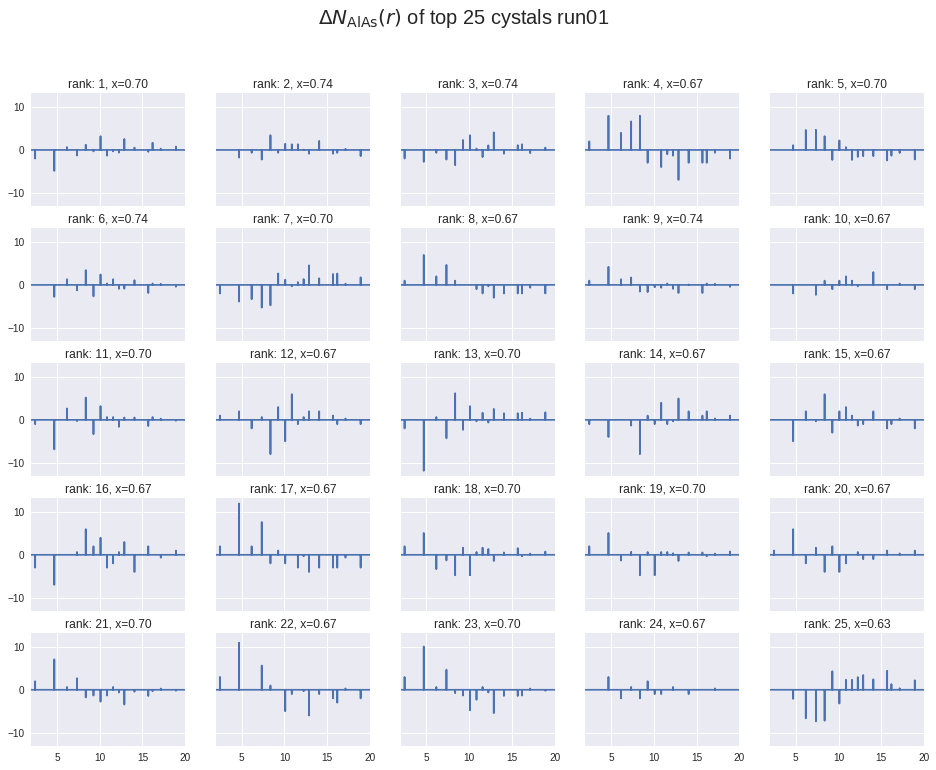

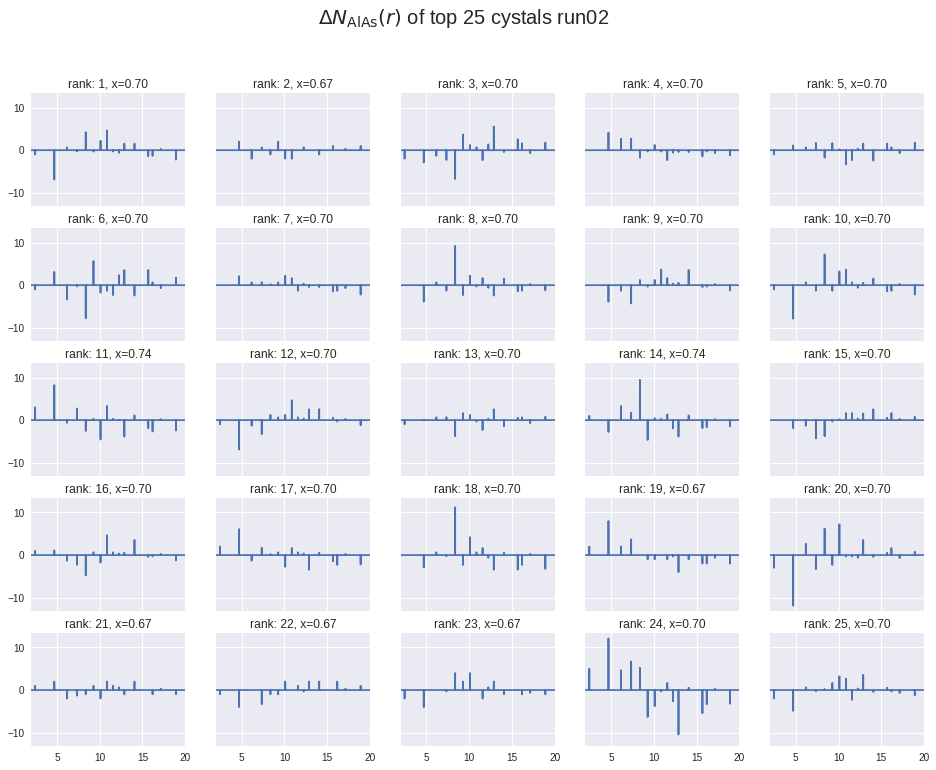

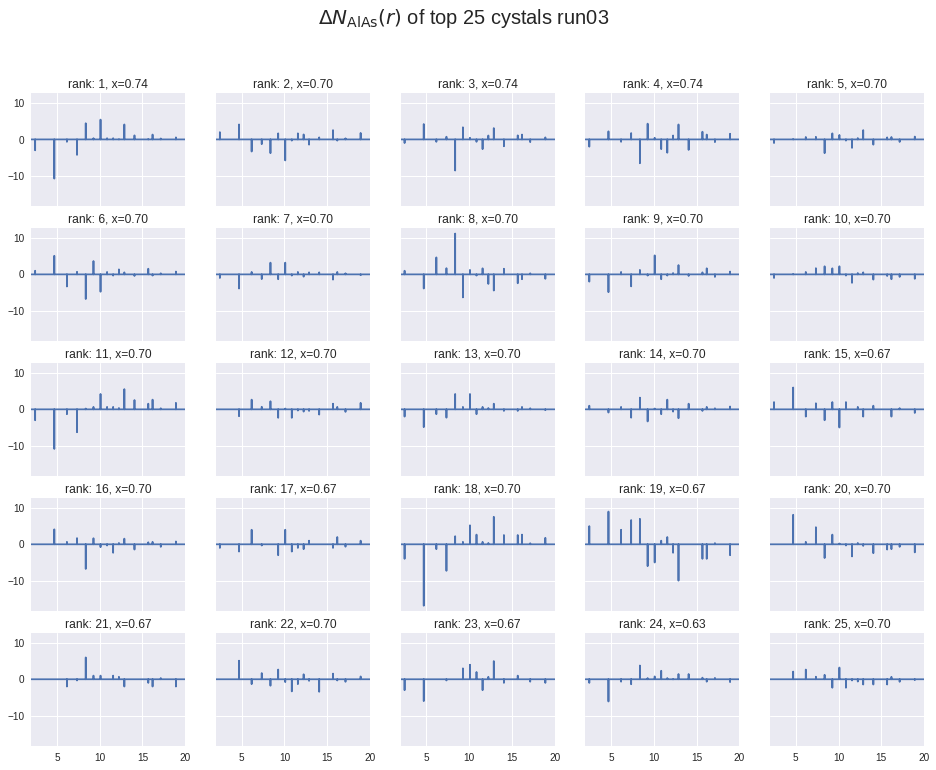

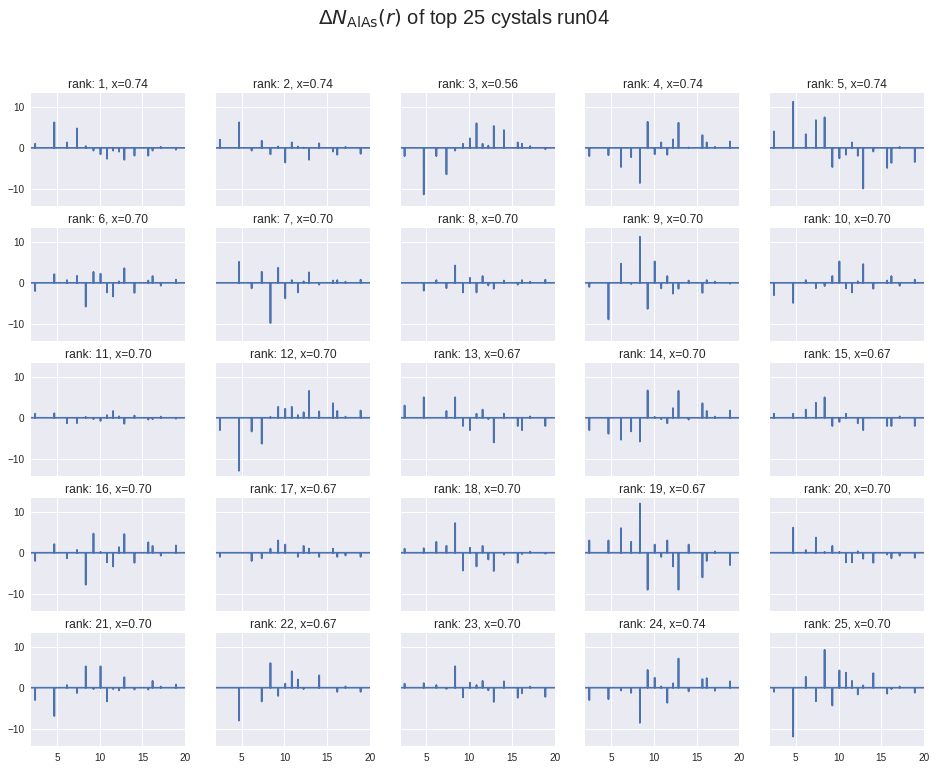

In [12]:
# optimization log
log01 = qtk.Logger('optimization/algaas_333_01.db')
log02 = qtk.Logger('optimization/algaas_333_02.db')
log03 = qtk.Logger('optimization/algaas_333_03.db')
log04 = qtk.Logger('optimization/algaas_333_04.db')

dN_AlAs_test(5, log01, 'run01')
dN_AlAs_test(5, log02, 'run02')
dN_AlAs_test(5, log03, 'run03')
dN_AlAs_test(5, log04, 'run04')

In [15]:
def dN_AlAs_average(N_mol, log):
    r, N_ref = mol_base.gr('Ga', 'As', radial_normalization=False)
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    
    mols = []
    for entry in log.list(order='descent')[:N_mol**2]:
        # extract dictionary of mutation location
        ccs_coord = ast.literal_eval(entry.content)
        # generate molecule object using ccs coordinate and ccs instance
        mols.append(ccs.generate(**ccs_coord))
    
    dN_tops = []
    x_list = []
    for mol in mols:
        x = np.ones(mol.N)[np.abs(np.array(mol.Z) - 13) < 0.001].sum() / (mol.N / 2.)
        r, N = mol.gr('Al', 'As', radial_normalization=False)
        dN_tops.append(N - x*N_ref)
    dN_tops = np.vstack(dN_tops)

    dN_mean = dN_tops.mean(0)
    dN_err = dN_tops.std(0)

    ax.plot(r, N_ref, label=r'$N_{\rm GaAs}^{\rm ref}(r)$', zorder=10)

    (_, caps, _) = ax.errorbar(
        r[N_ref>0], dN_mean[N_ref>0],
        yerr=[dN_err[N_ref > 0], dN_err[N_ref > 0]],
        ls='',
        capsize=7,
        fmt='o',
        color='orange',
        label=r'$\overline{\Delta N}_{\rm AlAs}(r)$',
        zorder=11
    )
    for cap in caps:
        cap.set_markeredgewidth(1)
    ax.plot(r[N_ref > 0], dN_tops[0][N_ref > 0], 
        ls='', marker='s', color='forestgreen',zorder=12, label=r'$\Delta N_{\rm AlAs}^{\rm best}(r)$'
    )
    ax.set_title(r"Averaged $\Delta N_{{\rm AlAs}}(r)$ over top {} crystals".format(N_mol**2), fontsize=20)
    ax.set_ylabel(r'$\overline{\Delta N}_{\rm AsAs}(r)$', fontsize=15)

    ax.legend(fontsize=15)
    pass

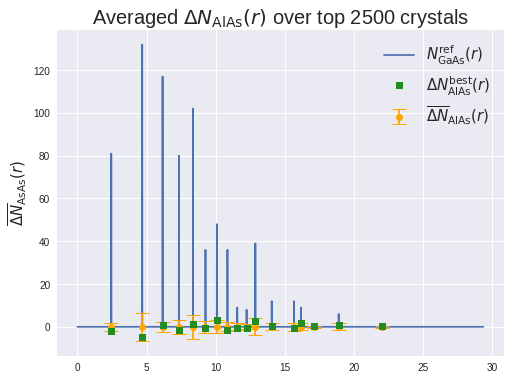

In [16]:
dN_AlAs_average(50, log01)